In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import gzip
import pickle


In [40]:
ratings_file = "../data/ratings.dat"
movies_file = "../data/movies.dat"
users_file = "../data/users.dat"

script_dir = os.path.dirname(os.path.abspath(__file__))
file_path_ratings_big = os.path.join(script_dir, ratings)
file_path_movies_big = os.path.join(script_dir, movies)


In [41]:
ratings = pd.read_csv(ratings_file, sep='::', engine='python', 
                      names=['UserID', 'MovieID', 'Rating', 'Timestamp'])
ratings['Timestamp'] = pd.to_datetime(ratings['Timestamp'], unit='s')

ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,2000-12-31 22:12:40
1,1,661,3,2000-12-31 22:35:09
2,1,914,3,2000-12-31 22:32:48
3,1,3408,4,2000-12-31 22:04:35
4,1,2355,5,2001-01-06 23:38:11


In [22]:
movies = pd.read_csv(movies_file, sep='::', engine='python', 
                     names=['MovieID', 'Title', 'Genres'], encoding='latin1')

movies.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [23]:
users = pd.read_csv(users_file, sep='::', engine='python', 
                    names=['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code'])

users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [24]:
ratings.isnull().sum()
users.isnull().sum()
movies.isnull().sum()

MovieID    0
Title      0
Genres     0
dtype: int64

In [25]:
ratings_with_movies = pd.merge(ratings, movies, on = 'MovieID')

ratings_with_movies.head()

,UserID,MovieID,Rating,Timestamp,Title,Genres
0,1,1193,5,2000-12-31 22:12:40,One Flew Over the Cuckoo's Nest (1975),Drama
1,1,661,3,2000-12-31 22:35:09,James and the Giant Peach (1996),Animation|Children's|Musical
2,1,914,3,2000-12-31 22:32:48,My Fair Lady (1964),Musical|Romance
3,1,3408,4,2000-12-31 22:04:35,Erin Brockovich (2000),Drama
4,1,2355,5,2001-01-06 23:38:11,"Bug's Life, A (1998)",Animation|Children's|Comedy


In [26]:
complete_data = pd.merge(ratings_with_movies, users, on = 'UserID')
complete_data.head()

,UserID,MovieID,Rating,Timestamp,Title,Genres,Gender,Age,Occupation,Zip-code
0,1,1193,5,2000-12-31 22:12:40,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,10,48067
1,1,661,3,2000-12-31 22:35:09,James and the Giant Peach (1996),Animation|Children's|Musical,F,1,10,48067
2,1,914,3,2000-12-31 22:32:48,My Fair Lady (1964),Musical|Romance,F,1,10,48067
3,1,3408,4,2000-12-31 22:04:35,Erin Brockovich (2000),Drama,F,1,10,48067
4,1,2355,5,2001-01-06 23:38:11,"Bug's Life, A (1998)",Animation|Children's|Comedy,F,1,10,48067


In [27]:
complete_data.to_csv('../data/cleaned_movie_data.csv', index=False)

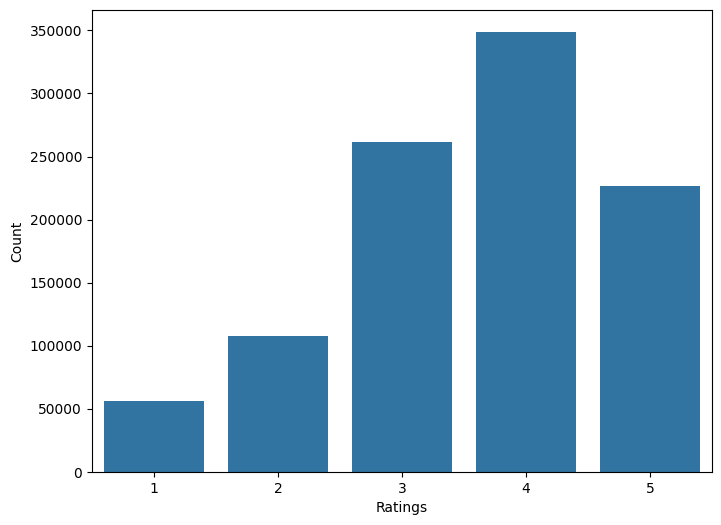

count    1.000209e+06
mean     3.581564e+00
std      1.117102e+00
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: Rating, dtype: float64


In [28]:
#rating distribution

plt.figure(figsize=(8,6))

sns.countplot(x='Rating', data= complete_data)

plt.xlabel('Ratings')
plt.ylabel('Count')

plt.show()

print(complete_data['Rating'].describe())

In [29]:
movie_popularity = complete_data.groupby('Title').size().sort_values(ascending=False)

movie_popularity.head(15)

complete_data.head()

,UserID,MovieID,Rating,Timestamp,Title,Genres,Gender,Age,Occupation,Zip-code
0,1,1193,5,2000-12-31 22:12:40,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,10,48067
1,1,661,3,2000-12-31 22:35:09,James and the Giant Peach (1996),Animation|Children's|Musical,F,1,10,48067
2,1,914,3,2000-12-31 22:32:48,My Fair Lady (1964),Musical|Romance,F,1,10,48067
3,1,3408,4,2000-12-31 22:04:35,Erin Brockovich (2000),Drama,F,1,10,48067
4,1,2355,5,2001-01-06 23:38:11,"Bug's Life, A (1998)",Animation|Children's|Comedy,F,1,10,48067


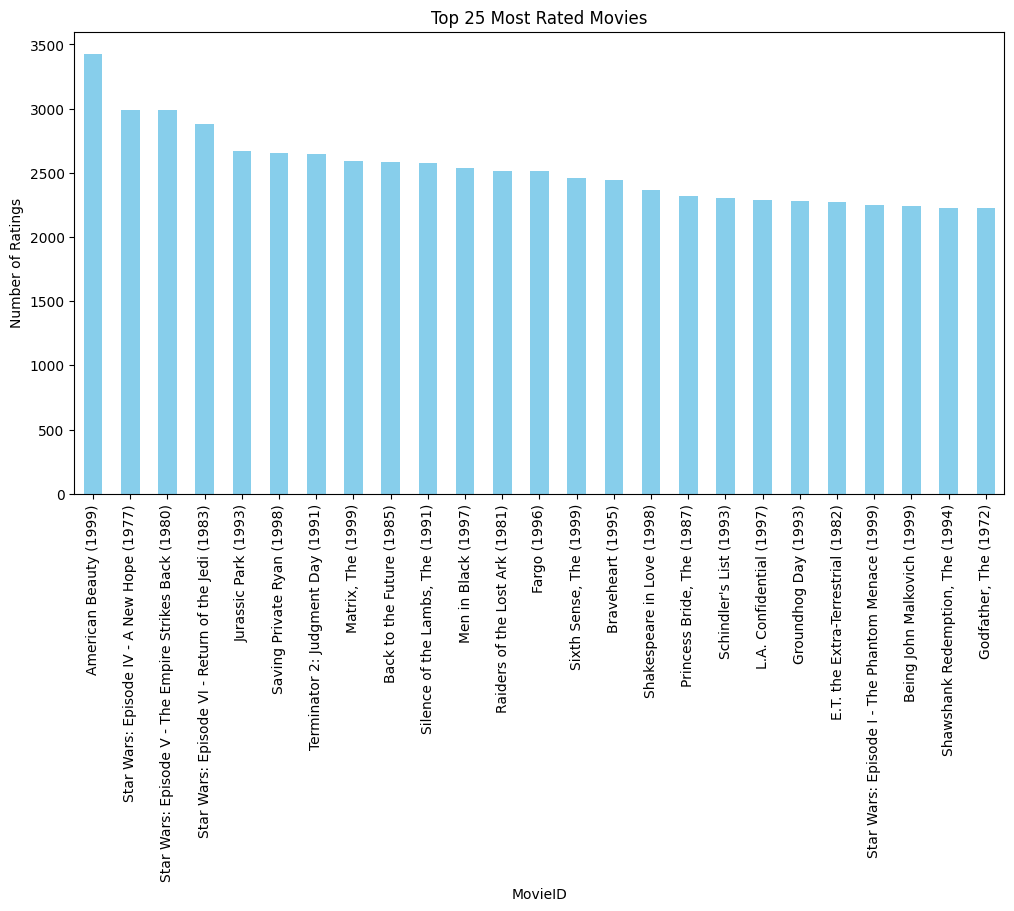

In [30]:
plt.figure(figsize=(12, 6))
movie_popularity.head(25).plot(kind='bar', color='skyblue')
plt.title('Top 25 Most Rated Movies')
plt.xlabel('MovieID')
plt.ylabel('Number of Ratings')
plt.show()

Title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
Men in Black (1997)                                      2538
Raiders of the Lost Ark (1981)                           2514
Fargo (1996)                                             2513
Sixth Sense, The (1999)                                  2459
Braveheart (1995)                                        2443
Shakespeare in Love (1998)                               2369
Pr

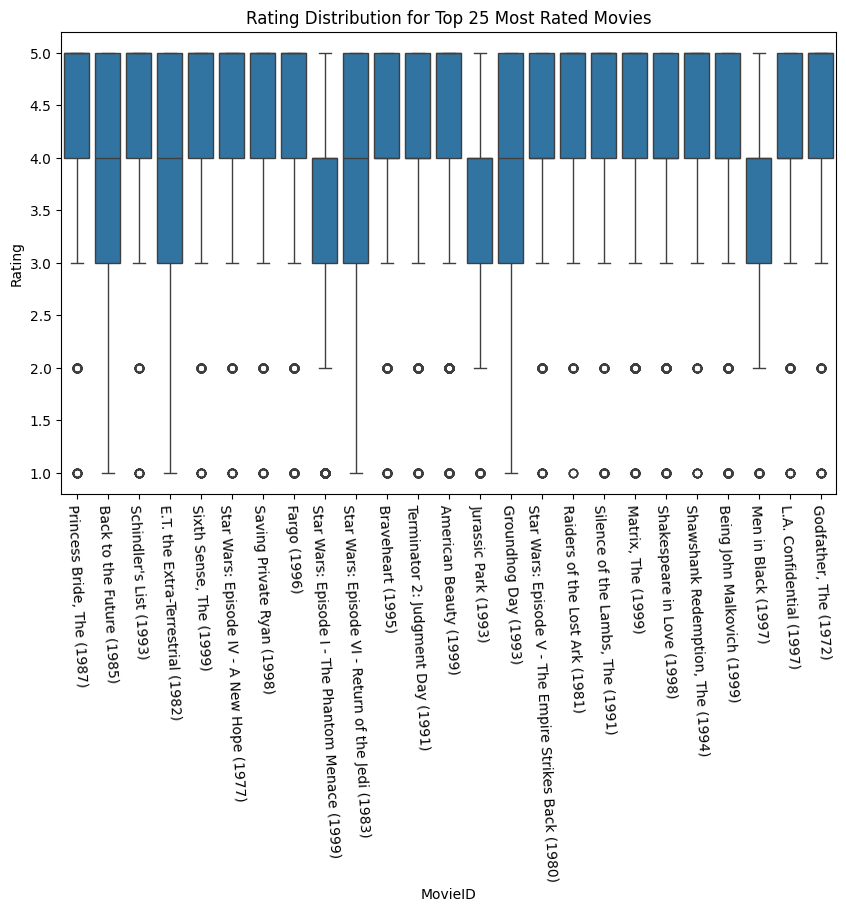

In [31]:
top_25_movies = movie_popularity.head(25)

print(top_25_movies)

top_rated_movies = complete_data[complete_data['Title'].isin(top_25_movies.index)]
plt.figure(figsize=(10, 6))
sns.boxplot(x='Title', y='Rating', data=top_rated_movies)
plt.title('Rating Distribution for Top 25 Most Rated Movies')
plt.xlabel('MovieID')
plt.ylabel('Rating')

plt.xticks(rotation=-87)
plt.show()

In [32]:
complete_data['Genres'] = complete_data['Genres'].str.split('|')

genres_exploded = complete_data.explode('Genres')

genres_exploded.head()

,UserID,MovieID,Rating,Timestamp,Title,Genres,Gender,Age,Occupation,Zip-code
0,1,1193,5,2000-12-31 22:12:40,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,10,48067
1,1,661,3,2000-12-31 22:35:09,James and the Giant Peach (1996),Animation,F,1,10,48067
1,1,661,3,2000-12-31 22:35:09,James and the Giant Peach (1996),Children's,F,1,10,48067
1,1,661,3,2000-12-31 22:35:09,James and the Giant Peach (1996),Musical,F,1,10,48067
2,1,914,3,2000-12-31 22:32:48,My Fair Lady (1964),Musical,F,1,10,48067


In [33]:
genre_popularity = genres_exploded.groupby('Genres').size().sort_values(ascending=False)

genre_popularity.head()



Genres
Comedy      356580
Drama       354529
Action      257457
Thriller    189680
Sci-Fi      157294
dtype: int64

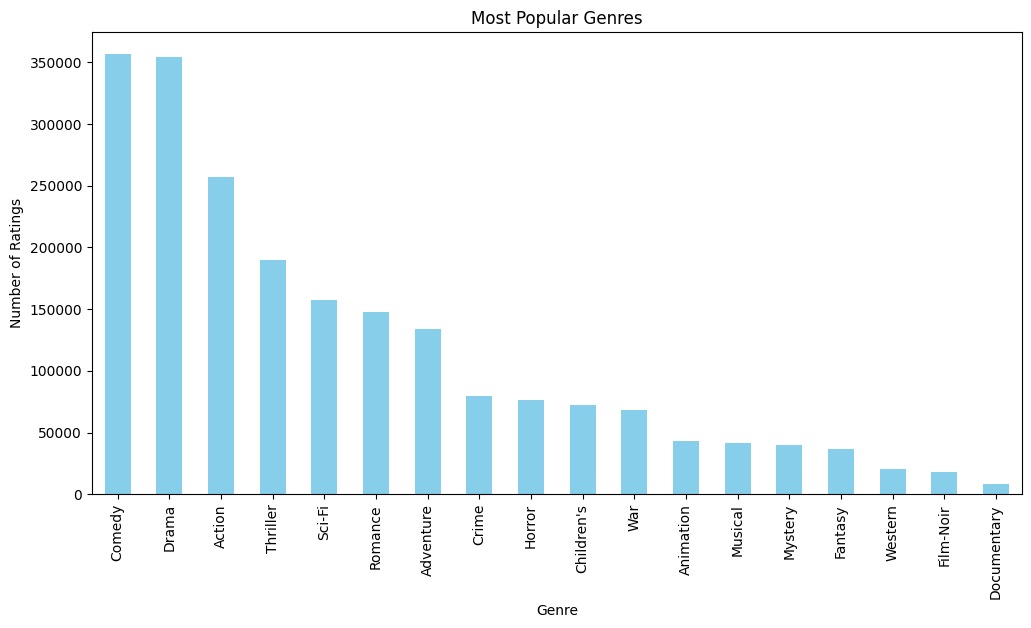

In [34]:
plt.figure(figsize=(12, 6))
genre_popularity.plot(kind='bar', color='skyblue')
plt.title('Most Popular Genres')
plt.xlabel('Genre')
plt.ylabel('Number of Ratings')
plt.show()

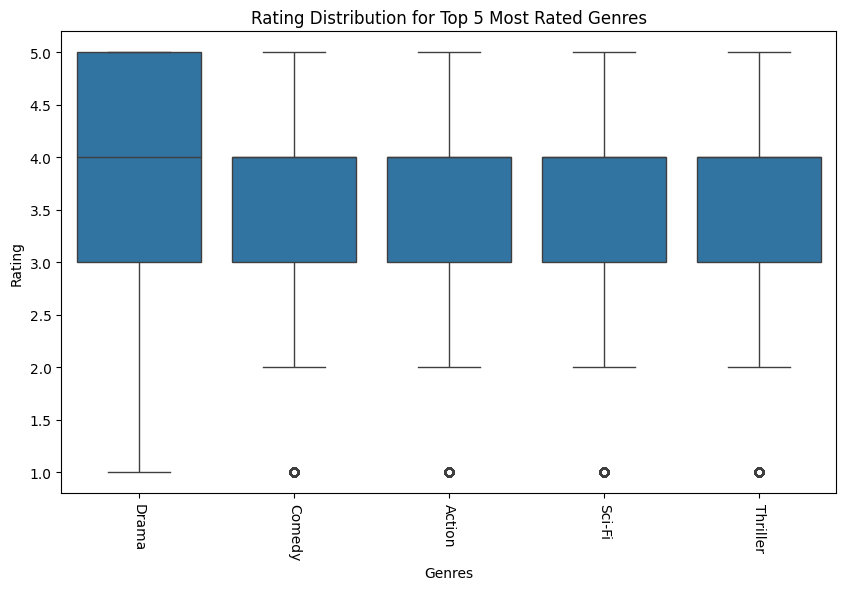

In [35]:
top_rated_genres = genres_exploded[genres_exploded['Genres'].isin(genre_popularity.head(5).index)]
plt.figure(figsize=(10, 6))
sns.boxplot(x='Genres', y='Rating', data=top_rated_genres)
plt.title('Rating Distribution for Top 5 Most Rated Genres')
plt.xlabel('Genres')
plt.ylabel('Rating')

plt.xticks(rotation=-90)
plt.show()

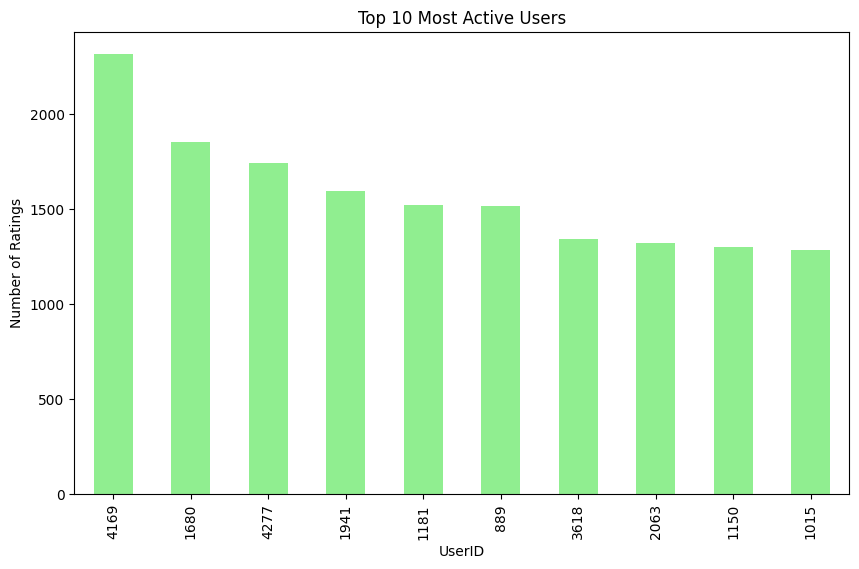

In [37]:
#user activity

user_activity = complete_data.groupby('UserID').size().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
user_activity.head(10).plot(kind='bar', color='lightgreen')
plt.title('Top 10 Most Active Users')
plt.xlabel('UserID')
plt.ylabel('Number of Ratings')
plt.show() 


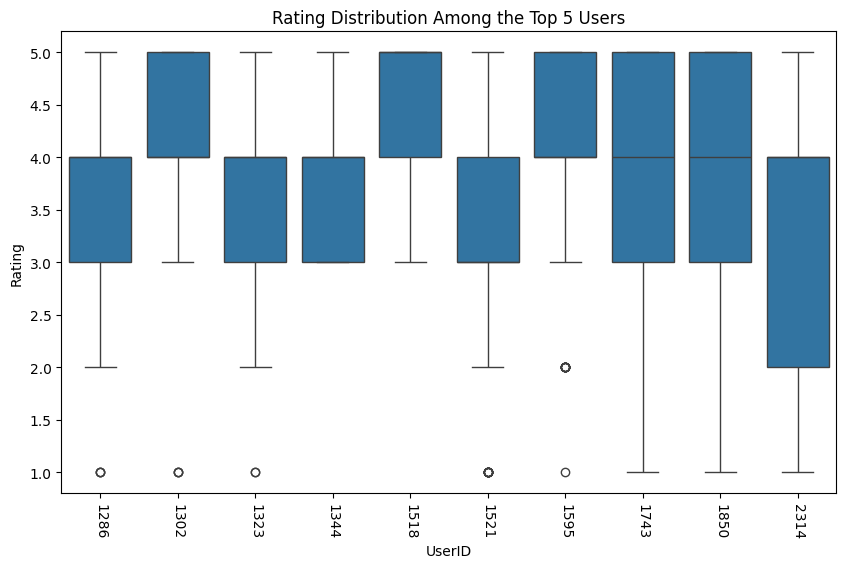

In [38]:
#what is the rating distribution amongst the most active users?

most_active_users = complete_data[complete_data['UserID'].isin(user_activity.head(10))]


plt.figure(figsize=(10, 6))
sns.boxplot(x='UserID', y='Rating', data=most_active_users)
plt.title('Rating Distribution Among the Top 5 Users')
plt.xlabel('UserID')
plt.ylabel('Rating')

plt.xticks(rotation=-90)
plt.show()
